In [199]:
import json
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

In [44]:
def load_json(fp):
    with open(fp) as f:
        data = json.load(f)
        return data

In [76]:
def plot_positive_predictions(category, category_confusion_matrix):
        bar_width = 0.35
        opacity = 0.4
        fig, ax = plt.subplots()
        index = 0
        
        tp_rate = category_confusion_matrix["tp_rate"] * 100
        fp_rate = category_confusion_matrix["fp_rate"] * 100

        rects1 = ax.bar(index, tp_rate, bar_width,
                    alpha=opacity, color='g', label="True Positives")

        rects2 = ax.bar(index + bar_width, fp_rate, bar_width,
                    alpha=opacity, color='r', label="False Positives")


        ax.set_xlabel('Prediction Type')
        ax.tick_params(
            axis='x',  
            which='both',
            bottom='off',
            top='off',
            labelbottom='off')
        
        ax.set_ylabel('Count')
        ax.set_title('Positive Prediction by Type | Category: (%s)'% (category.title()))
        ax.legend()
        
        fig.tight_layout()
        plt.show()

In [77]:
def plot_negative_predictions(category, category_confusion_matrix):
        bar_width = 0.35
        opacity = 0.4

        fig, ax = plt.subplots()
        index = 0
        
        tn_rate = category_confusion_matrix["tn_rate"] * 100
        fn_rate = category_confusion_matrix["fn_rate"] * 100

        rects1 = ax.bar(index, tn_rate, bar_width,
                    alpha=opacity, color='g', label="True Negatives")

        rects2 = ax.bar(index + bar_width, fn_rate, bar_width,
                    alpha=opacity, color='r', label="False Negatives")


        ax.set_xlabel('Prediction Type')
        ax.tick_params(
            axis='x',  
            which='both',
            bottom='off',
            top='off',
            labelbottom='off')
        
        ax.set_ylabel('Count')
        ax.set_title('Positive Prediction by Type | Category: (%s)'% (category.title()))
        ax.legend()
        
        fig.tight_layout()
        plt.show()

In [201]:
def log_example_prediction_rates(category, category_evaluation_data, n=100, unit="day"):
    precision = category_evaluation_data["precision_score"]
    precision = round(precision, 2) * 100
    most_commonly_confused_class = category_evaluation_data["most_commonly_confused_class"]
    category_confusion_matrix = category_evaluation_data["confusion_matrix"]
    num_correct_predictions = category_confusion_matrix["tp_rate"] * n
    num_incorrect_predictions = category_confusion_matrix["fp_rate"] * n
    
    message = "For category {category} if we had to make {n} predictions per {unit} we would have {precision}% precision with {num_correct_predictions} correct predictions and {num_incorrect_predictions} incorrect predictions. Most confused class is {most_commonly_confused_class}"
    print(message.format(category=category, n=n, unit=unit, precision=precision, num_correct_predictions=num_correct_predictions, num_incorrect_predictions=num_incorrect_predictions, most_commonly_confused_class=most_commonly_confused_class))
    

In [207]:
fp = "/Users/jnewman/Projects/learning/complete-ai/ai/blog_post_performance/training_runs/1549930022.740108/cnn_keras_evaluation_data_path.json"
data = load_json(fp)
data.keys()
coin_toss_data = data["coin_toss_data"]

Normalized confusion matrix
[[9.86734694e-01 0.00000000e+00 3.06122449e-03 0.00000000e+00
  0.00000000e+00 0.00000000e+00 4.08163265e-03 1.02040816e-03
  3.06122449e-03 2.04081633e-03]
 [0.00000000e+00 9.88546256e-01 8.81057269e-04 4.40528634e-03
  0.00000000e+00 8.81057269e-04 2.64317181e-03 8.81057269e-04
  1.76211454e-03 0.00000000e+00]
 [9.68992248e-04 9.68992248e-04 9.84496124e-01 2.90697674e-03
  0.00000000e+00 0.00000000e+00 0.00000000e+00 7.75193798e-03
  2.90697674e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.98019802e-03 9.90099010e-01
  0.00000000e+00 2.97029703e-03 0.00000000e+00 3.96039604e-03
  9.90099010e-04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.03665988e-03 0.00000000e+00
  9.77596741e-01 0.00000000e+00 4.07331976e-03 0.00000000e+00
  2.03665988e-03 1.42566191e-02]
 [1.12107623e-03 0.00000000e+00 0.00000000e+00 1.12107623e-02
  0.00000000e+00 9.83183857e-01 2.24215247e-03 1.12107623e-03
  1.12107623e-03 0.00000000e+00]
 [2.08768267e-03 2.08768267e-0

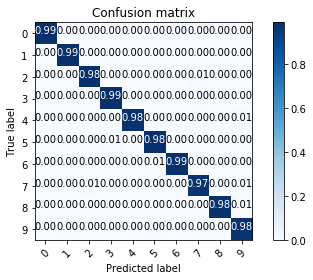

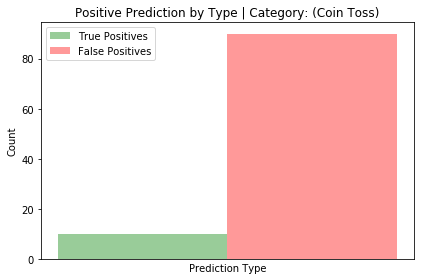

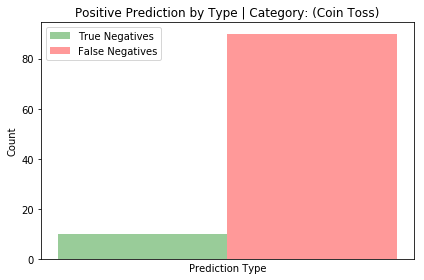

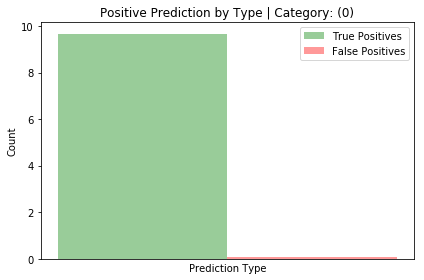

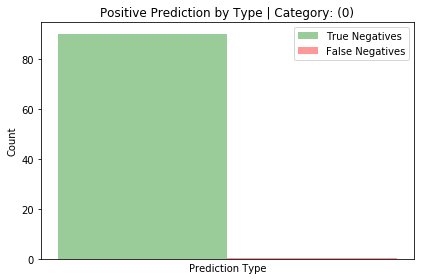

For category 1 if we had to make 100000 predictions per day we would have 99.0% precision with 11220.0 correct predictions and 80.0 incorrect predictions. Most confused class is 3


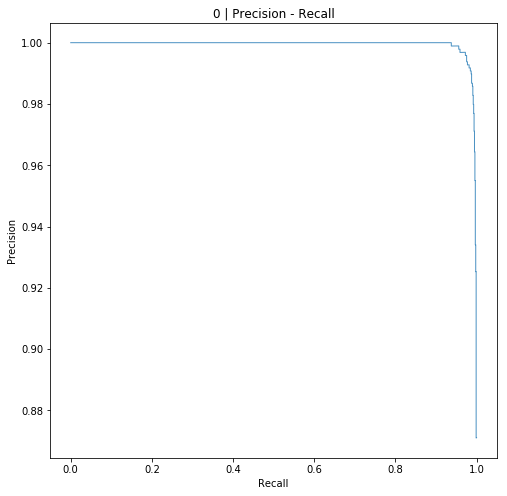

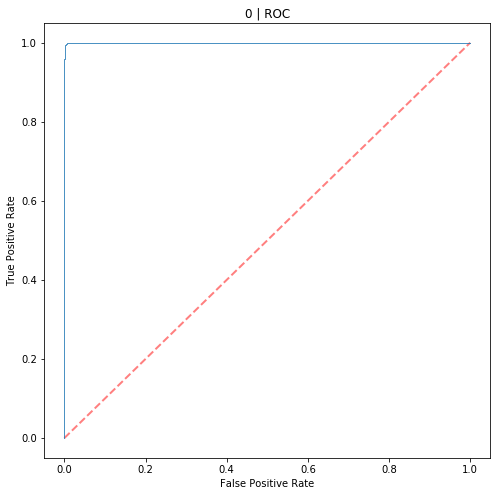

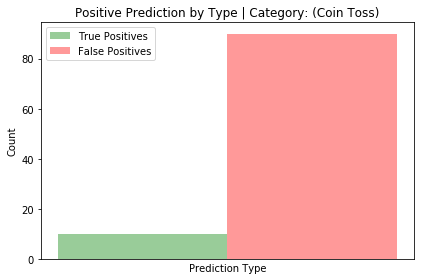

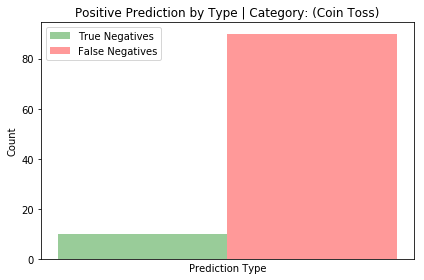

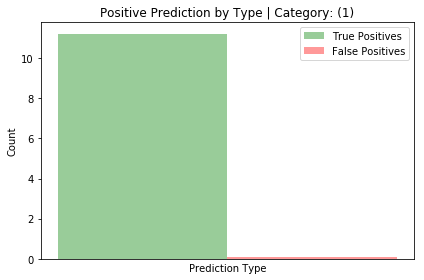

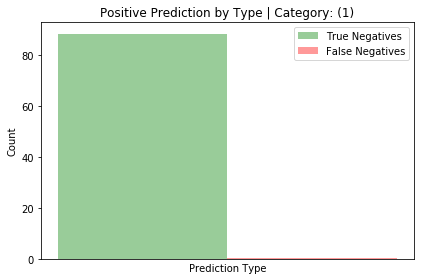

For category 2 if we had to make 100000 predictions per day we would have 98.0% precision with 10160.0 correct predictions and 250.0 incorrect predictions. Most confused class is 7


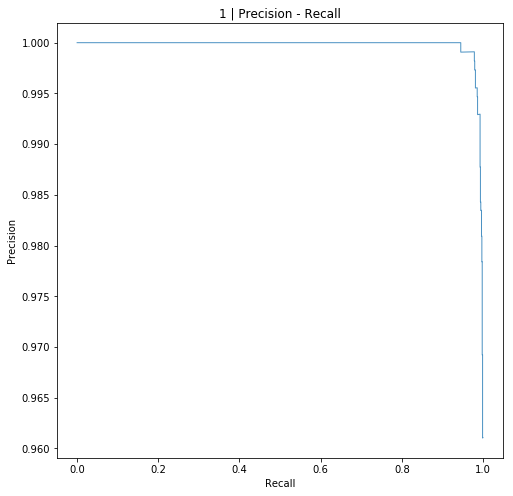

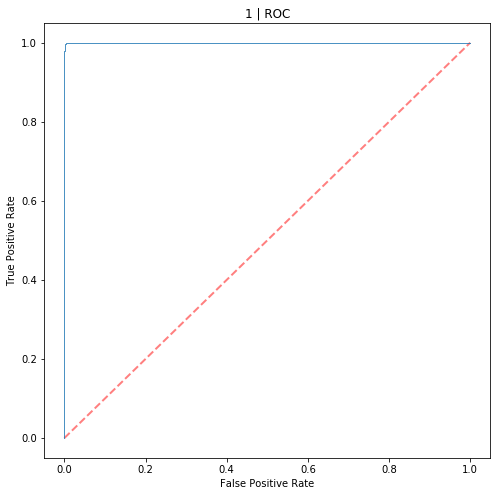

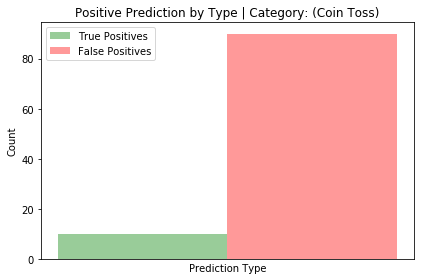

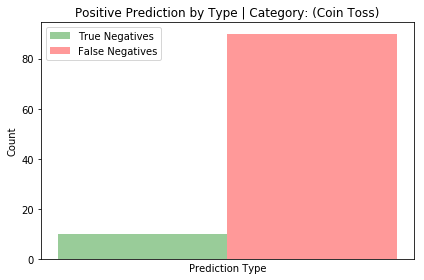

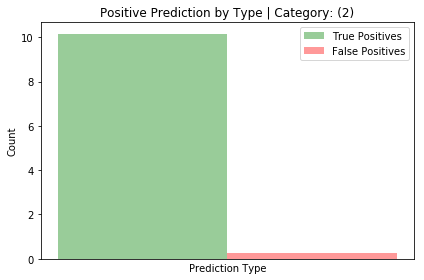

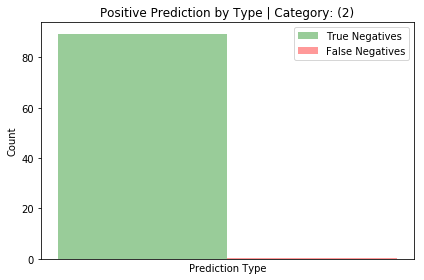

For category 3 if we had to make 100000 predictions per day we would have 98.0% precision with 10000.0 correct predictions and 250.0 incorrect predictions. Most confused class is 7


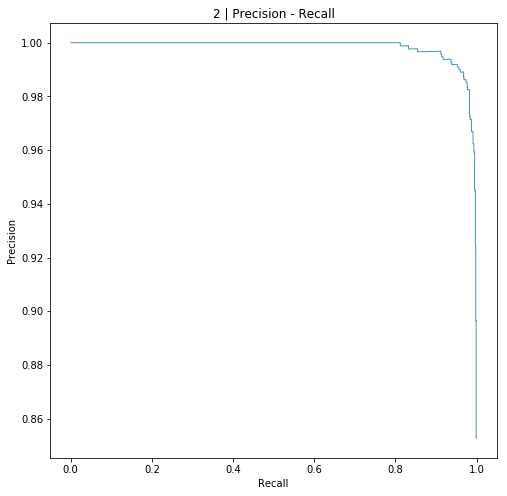

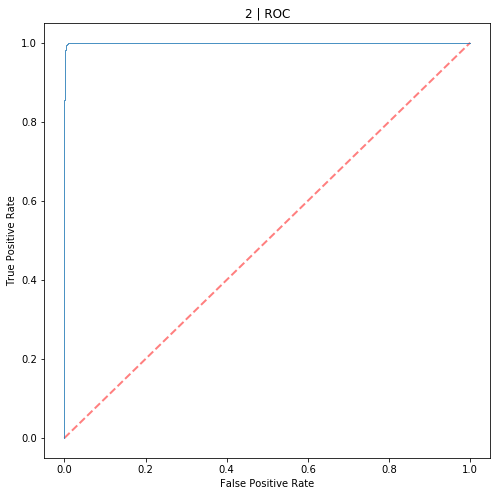

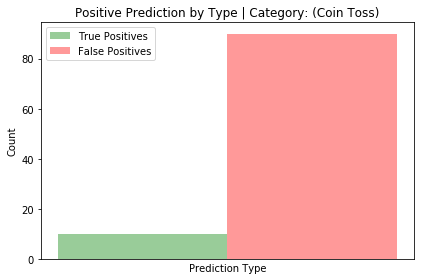

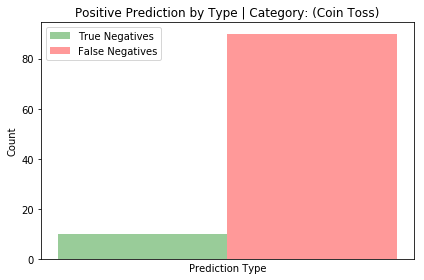

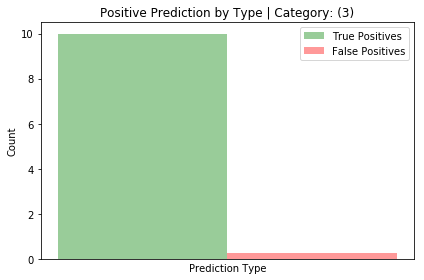

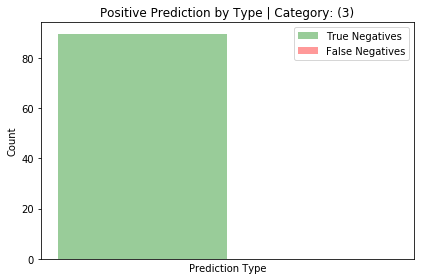

For category 4 if we had to make 100000 predictions per day we would have 100.0% precision with 9600.0 correct predictions and 40.0 incorrect predictions. Most confused class is 9


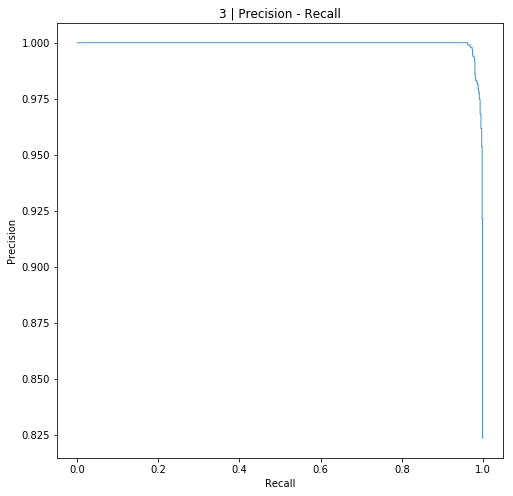

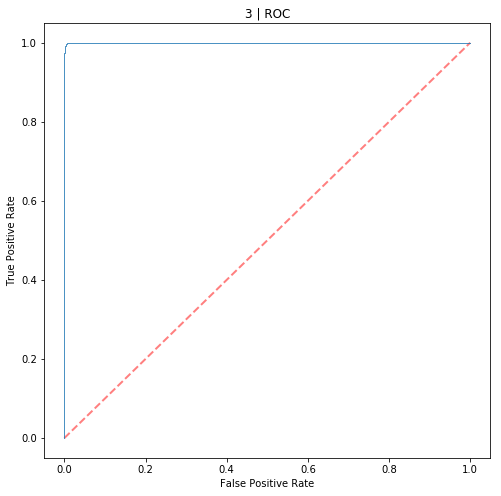

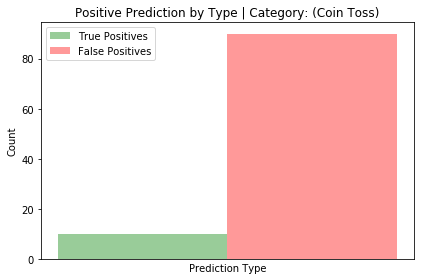

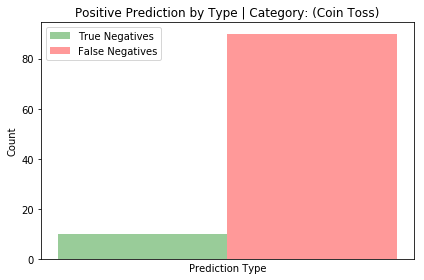

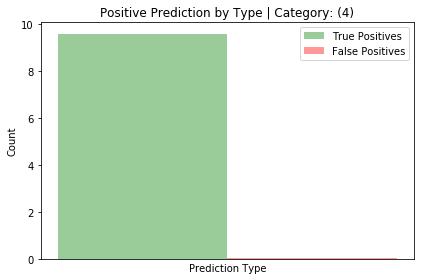

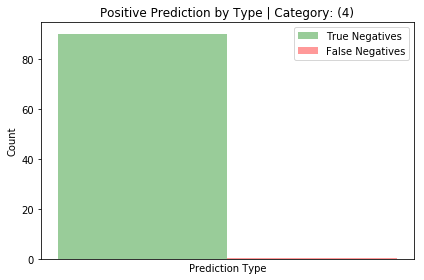

For category 5 if we had to make 100000 predictions per day we would have 98.0% precision with 8770.0 correct predictions and 140.0 incorrect predictions. Most confused class is 3


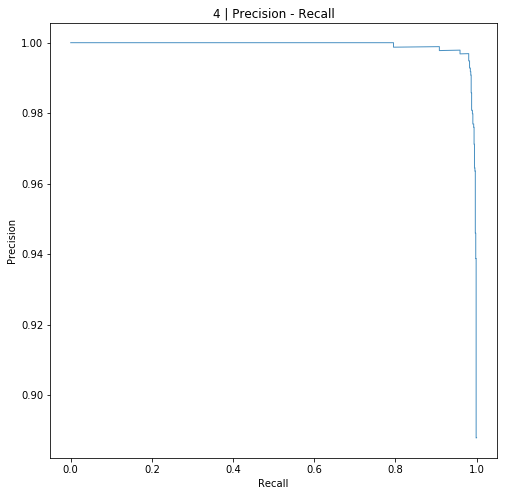

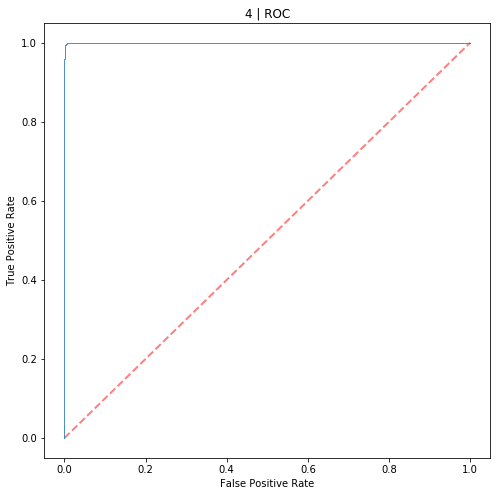

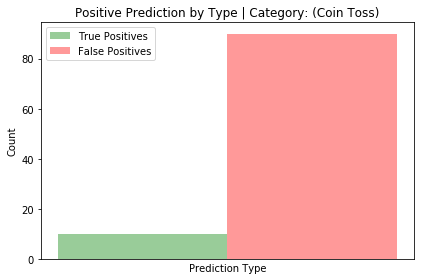

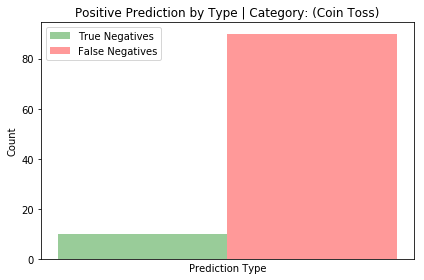

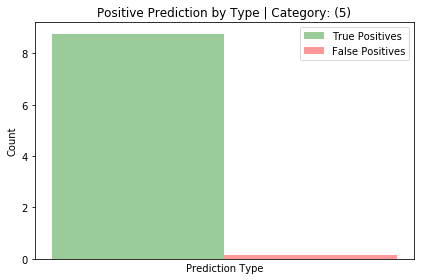

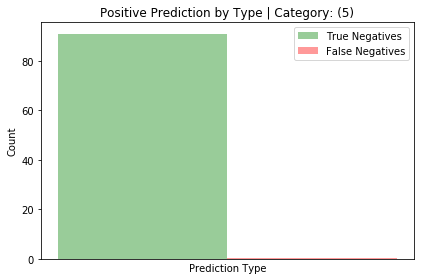

For category 6 if we had to make 100000 predictions per day we would have 99.0% precision with 9460.0 correct predictions and 140.0 incorrect predictions. Most confused class is 5


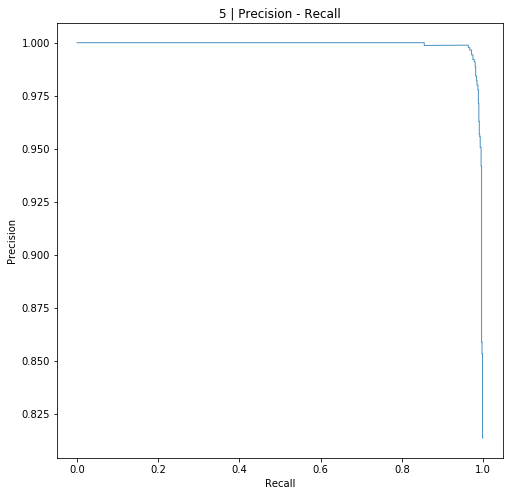

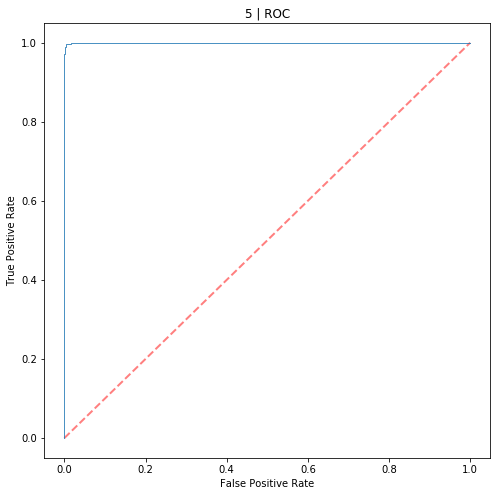

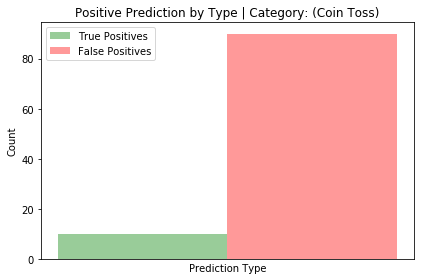

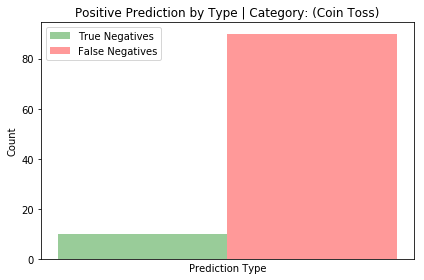

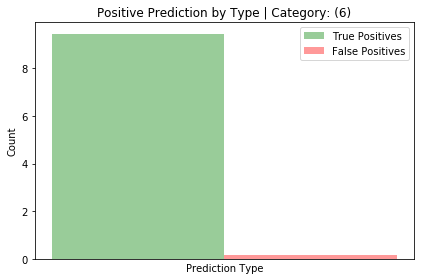

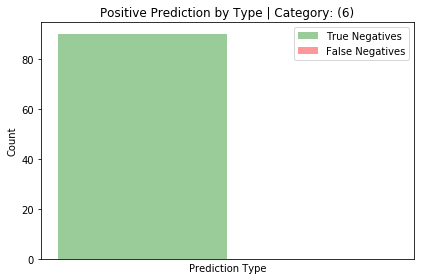

For category 7 if we had to make 100000 predictions per day we would have 98.0% precision with 9990.0 correct predictions and 220.0 incorrect predictions. Most confused class is 2


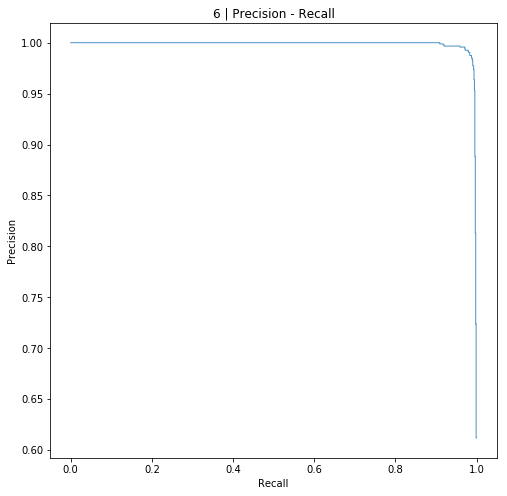

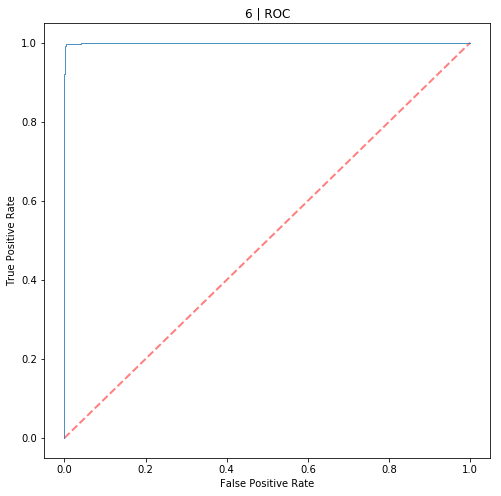

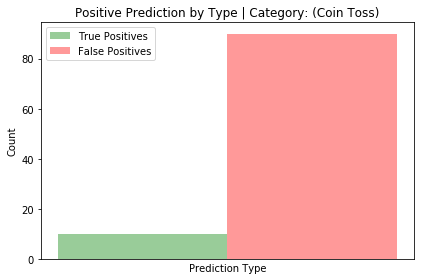

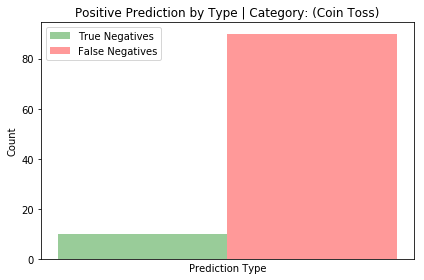

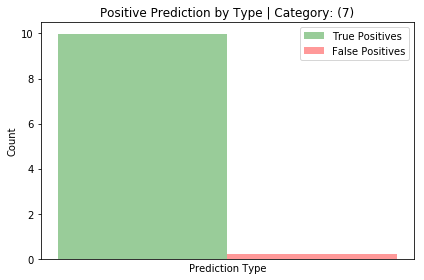

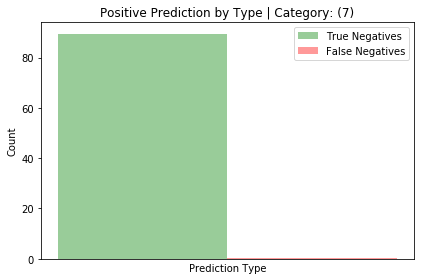

For category 8 if we had to make 100000 predictions per day we would have 98.0% precision with 9540.0 correct predictions and 190.0 incorrect predictions. Most confused class is 9


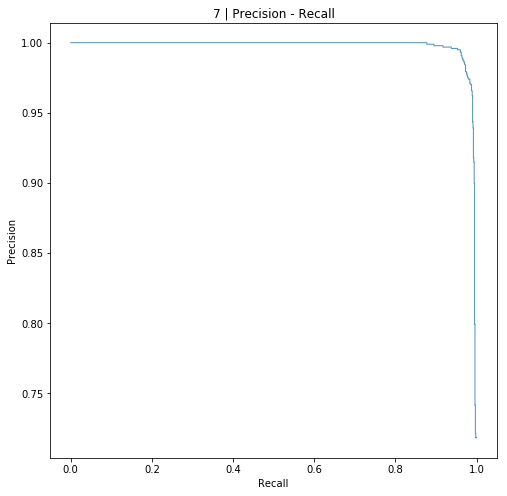

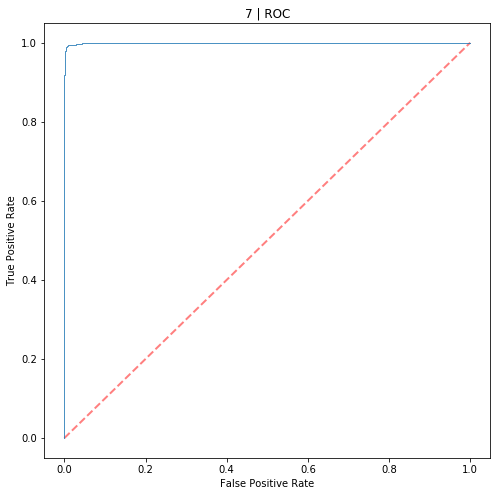

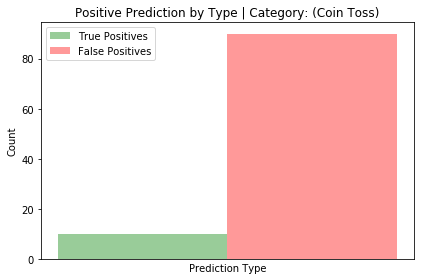

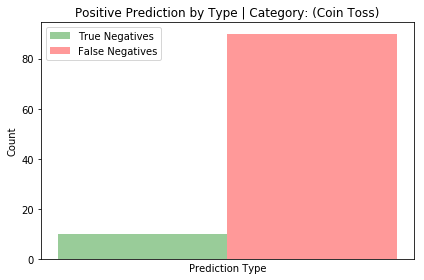

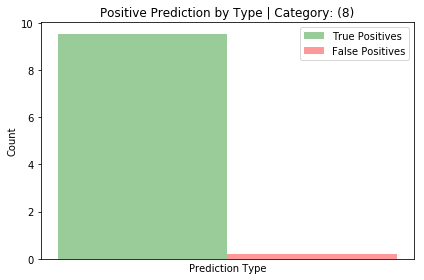

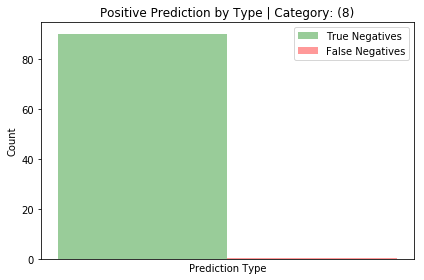

For category 9 if we had to make 100000 predictions per day we would have 97.0% precision with 9860.0 correct predictions and 330.0 incorrect predictions. Most confused class is 8


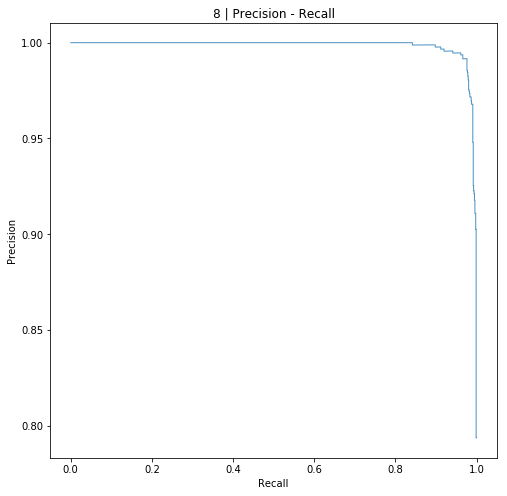

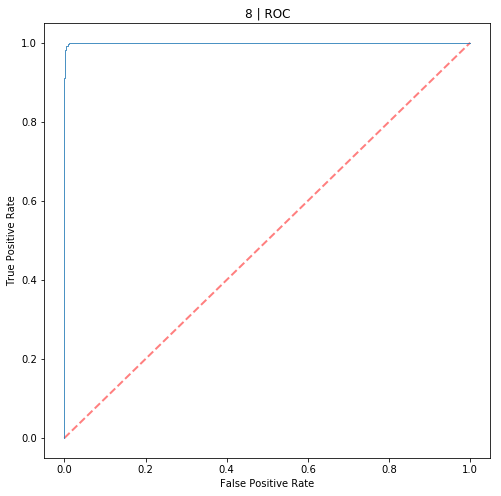

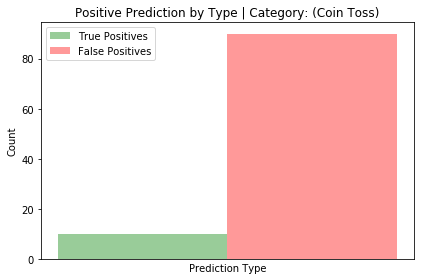

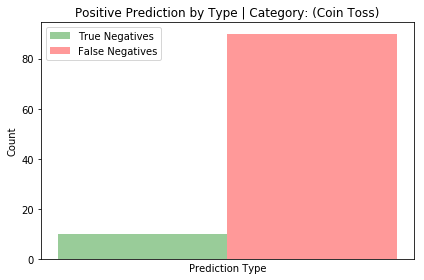

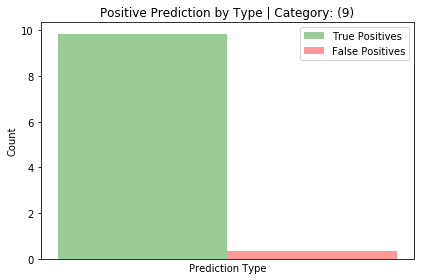

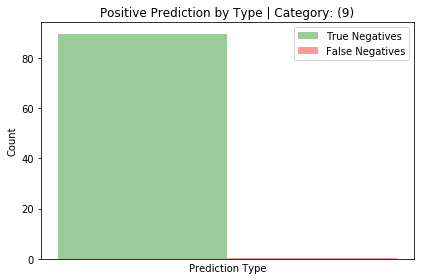

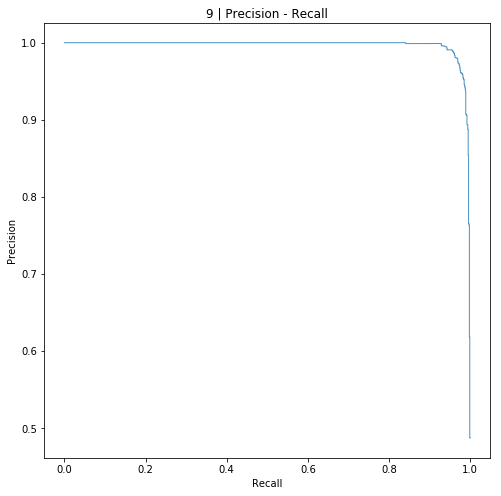

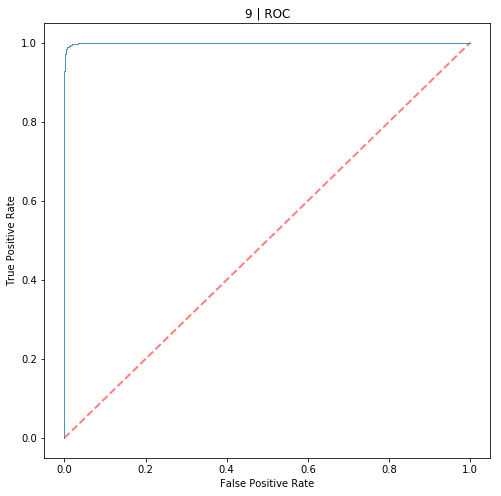

In [208]:
plot_confusion_matrix(data["confusion_matrix"], data["category_metrics"].keys(), normalize=True)
for category, category_evaluation_data in data["category_metrics"].items():
    log_example_prediction_rates(category, category_evaluation_data, n=100000)
    plot_positive_predictions("Coin Toss", cointoss_data["confusion_matrix"])
    plot_negative_predictions("Coin Toss", cointoss_data["confusion_matrix"])
    plot_positive_predictions(category, category_evaluation_data["confusion_matrix"])
    plot_negative_predictions(category, category_evaluation_data["confusion_matrix"])
    plot_figures(category, category_evaluation_data)

In [ ]:
def get_precision_recall_figure(category):
    figure = plt.figure(figsize=(8, 8))
    title = category + " | " + "Precision - Recall"
    ax = figure.gca()
    ax.set_title(title)
    ax.set_xlabel("Recall")
    ax.set_ylabel("Precision")
    return figure

In [168]:
def get_roc_figure(category):
    figure = plt.figure(figsize=(8, 8))
    title = category + " | " + "ROC"
    ax = figure.gca()
    ax.set_title(title)
    ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Coin Flip", alpha=.5)
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    return figure

In [182]:
def plot_figures(category, category_evaluation_metrics):
    precision, recall, _ = category_evaluation_metrics["precision_recall_curve"]
    f1 = category_evaluation_metrics["f1_score"]
    auc = category_evaluation_metrics["auc_score"]
    fpr, tpr, _ = category_evaluation_metrics["roc_curve"]
    model_label = category
    
    precision_recall_figure = get_precision_recall_figure(category)
    roc_figure = get_roc_figure(category)
    precision_recall_ax = precision_recall_figure.gca()
    precision_recall_ax.plot(
        recall,
        precision,
        lw=1,
        alpha=0.8,
        label="%s (F1 = %0.4f)" % (model_label, f1),
    )
    roc_ax = roc_figure.gca()
    roc_ax.plot(fpr, tpr, lw=1, alpha=0.8, label="%s (AUC = %0.4f)" % (model_label, auc))

In [209]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    cm = np.array(cm)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()